## Linear Regression & Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [ ]:
whitedata = pd.read_csv("white.csv")   # dataframe
whitedata.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
y      0
dtype: int64

In [ ]:
whitedata.head()  # whitedata.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Linear Regression 

- 단순 선형 모형
- 

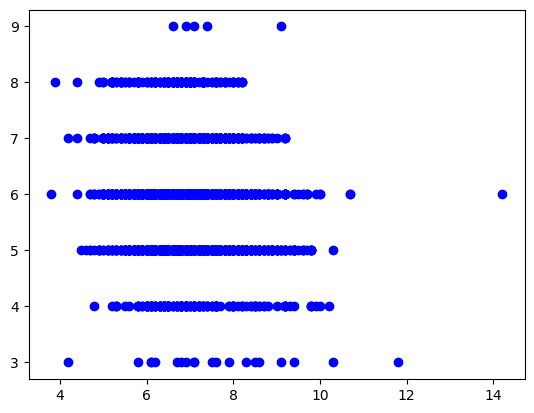

In [ ]:
y = whitedata.y  # whitedata["y"]
x = whitedata.x1
plt.scatter(x,y,color="blue"); plt.show()       # 산점도

In [ ]:
x = whitedata["x1"].to_frame() # 데이터 프레임 형태가 된다
y = whitedata.y

In [ ]:
slm = LinearRegression().fit(x,y)        
w, b = slm.coef_[0], slm.intercept_
print(w,b)

-0.1192889886319587 6.695610039009974


In [ ]:
x0, x1 = x["x1"].min(), x["x1"].max()
print(x0, x1)

3.8 14.2


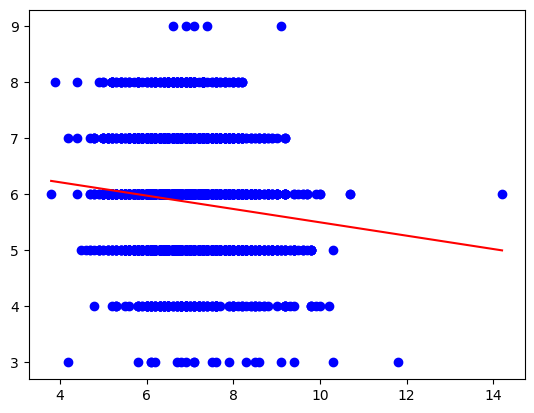

In [ ]:
plt.scatter(x,y,color="blue")
plt.plot([x0,x1],[w*x0+b,w*x1+b],'r'); plt.show()

In [ ]:
model = sm.OLS(y, sm.add_constant(x))   # sm.OLS(y,x)와 비교
results = model.fit()   # sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     64.08
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.48e-15
Time:                        16:05:27   Log-Likelihood:                -6322.8
No. Observations:                4898   AIC:                         1.265e+04
Df Residuals:                    4896   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6956      0.103     65.057      0.0

In [ ]:
## Multiple linear regression
X = whitedata.drop(["y"],axis=1)
y = whitedata["y"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
lrm = LinearRegression(n_jobs=-1)      # fit_intercept=True  -1이면 모든 코어를 사용하여 작업
result = lrm.fit(X_train, y_train)
print(result.coef_)

[ 8.00846101e-02 -1.70374343e+00  5.69767648e-02  8.17351234e-02
 -1.64381383e-02  4.96141486e-03 -4.74149230e-04 -1.48223181e+02
  7.49786197e-01  7.33900620e-01  2.08766177e-01]


In [ ]:
print(result.feature_names_in_) # 피처의 이름이 기억 안나면

['x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11']


In [ ]:
forecast = lrm.predict(X_test)
print(forecast[0:10]) 
# 등급? 22:00 녹음

[6.13867211 4.87485387 5.80282258 6.02253147 6.30505131 6.55048122
 5.98089896 6.06284824 5.56466996 5.94534116]


In [ ]:
accuracy = lrm.score(X_test, y_test)    # 결정계수
print(accuracy)

0.2480396226265077


In [ ]:
## statmodel 사용해 봄 
model = sm.OLS(y_train, sm.add_constant(X_train))   # sm.OLS(y,x)와 비교
results = model.fit()   # sm.OLS(y, sm.add_constant(x)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.70e-248
Time:                        16:14:24   Log-Likelihood:                -3878.0
No. Observations:                3428   AIC:                             7780.
Df Residuals:                    3416   BIC:                             7854.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.5394     21.311      6.923      0.0

### LASSO, Ridge regression

- Elastic net
$$ \min_{\beta \in R^p} \left\{ ||y- X \beta||_2^2 + \lambda_1 ||\beta||_1 + \lambda_2 ||\beta||_2^2 \right\} $$

    $$ \Beta 의 절댓값을 다 더해서 ... $$
- Lasso : $\lambda_2 = 0$
- Ridge : $\lambda_1 = 0$

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)  # alpha=0: OLS

In [ ]:
lasso.fit(X_train, y_train) # 랏소 핏팅 beta가 0..보다 작아서 0으로 만들어버림 
print(lasso.intercept_ , lasso.coef_ )

3.1350119050228873 [-0.         -0.          0.          0.00658765 -0.          0.00931903
 -0.0026721  -0.          0.          0.          0.26000292]


In [ ]:
forecast = lasso.predict(X_test)
print(forecast[0:10])

[5.98542298 5.39795764 5.75828732 5.94075017 6.3486235  6.35493312
 5.74667097 6.083002   5.67070478 5.79674228]


In [ ]:
#### mse가 작다 = 설명력이 높다  - 녹음 39:00
#### 언제 사용하는지 버벅거리지 않고 설명할 수 있어야.

In [ ]:
## training-validation procedure(반복 with train-test-split)
from sklearn.metrics import mean_squared_error

result = np.zeros((10,5))
a = [0.001, 0.002, 0.003, 0.004, 0.005]
for step in range(10):
    X0, X1, y0, y1 = train_test_split(X, y, test_size=0.3)
    for choice in range(len(a)):
        lasso = Lasso(alpha=a[choice])      # sklearn.preprocessing.StandardScaler
        lasso.fit(X0, y0); forecast = lasso.predict(X1)
        result[step,choice] = mean_squared_error(y1,forecast)
print(result)

In [ ]:
result = pd.DataFrame(result)
result.mean()

### Logistic Regression

In [ ]:
whitedata["good"] = (whitedata.y > 5).astype(float)

y_binary = whitedata["good"]
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=100)

In [ ]:
# statmodels
logit_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()

In [ ]:
print(logit_sm.summary())

In [ ]:
print("Parameters:",logit_sm.params)
print("Eta:", logit_sm.fittedvalues[0:10])

In [ ]:
muhat = logit_sm.predict(sm.add_constant(X_test))
print("prob:", muhat[0:10])

In [ ]:
yhat = (muhat > 0.5).astype(int)
print(yhat[0:10])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, yhat) 
print ("Confusion Matrix : \n", cm) 

In [ ]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, yhat))

In [ ]:
## 변수지정
import statsmodels.formula.api as smf
model = "good ~ x1+x2+x4+x6+x10"
logit_smf = smf.logit(formula=str(model),data=whitedata).fit()
logit_smf.summary()

In [ ]:
#sklearn : “statsmodels”과 다른 설정

from sklearn.linear_model import LogisticRegression

In [ ]:
logitS = LogisticRegression(penalty=None)  ## C=1/alpha=1, penality="l2" {"l1","l2","elasticnet",None}
logitS.fit(X_train, y_train)    

In [ ]:
print(logitS.coef_, logitS.intercept_)      

In [ ]:
#### The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
-‘lbfgs’ - [‘l2’, None]
-‘liblinear’ - [‘l1’, ‘l2’]
-‘newton-cg’ - [‘l2’, None]
-‘newton-cholesky’ - [‘l2’, None]
-‘sag’ - [‘l2’, None]
-‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

In [ ]:
logitL = LogisticRegression(penalty="l1",solver="saga")  # LASSO , C = 1/alpha    
logitL.fit(X_train, y_train)   

In [ ]:
muL = logitL.predict_proba(X_test)
yhat = logitL.predict(X_test)
print(muL[0:10])
print(yhat[0:10])

In [ ]:
logitL.score(X_test, y_test)  

### 다범주 로짓 모형

In [ ]:
from sklearn import datasets   
# iris data
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

In [ ]:
from statsmodels.discrete.discrete_model import MNLogit

In [ ]:
mlogit_sm = MNLogit(Y,sm.add_constant(X)).fit(maxiter=100,method="bfgs")
mlogit_sm.summary()

In [ ]:
prob = mlogit_sm.predict(sm.add_constant(X))
print(prob[0:10])

In [ ]:
yhat = np.argmax(prob,1)
print(yhat[0:10])

### LASSO with statsmodels

In [ ]:
mlogit_sm = MNLogit(Y,sm.add_constant(X))
mlogit_smL = mlogit_sm.fit_regularized(method="l1", alpha=0.5)
mlogit_smL.summary()

In [ ]:
yhatL = np.argmax(mlogit_smL.predict(sm.add_constant(X)),1)
print(yhatL[0:10])

In [ ]:
# Sklearn
mlogitR = LogisticRegression(C=1e5)  # multi_class="auto" {'ovr','multinomial','auto'}  
mlogitR.fit(X,Y)

In [ ]:
muR = mlogitR.predict_proba(X)
yhatR = np.argmax(muR,1)
print(muR[0:10])
print(yhatR[0:10])

In [ ]:
## 그림으로 표시
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlogitR.predict(np.c_[xx.ravel(), yy.ravel()])
# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max());  plt.ylim(yy.min(), yy.max())
plt.xticks(()); plt.yticks(())
plt.show()